In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\setuptools\_ven

In [4]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
ase                           3.22.1
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat 

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
import cv2

In [12]:
import cv2
data_dir = 'fire_dataset' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
from PIL import Image
import os
image_exts = ["jpg", "jpeg", "png", "gif", "bmp"]

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = Image.open(image_path)
            image_ext = img.format.lower()
            if image_ext not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, e))


Image not in ext list fire_dataset\fire_images\aerial-footage-fire-and-smoke-footage-135656414_iconl.jpeg
Image not in ext list fire_dataset\fire_images\aerial-panoramic-view-forest-fire-footage-128408610_iconl.jpeg
Image not in ext list fire_dataset\fire_images\aerial-tracking-drone-shot-overlooking-footage-120943106_iconl.jpeg
Image not in ext list fire_dataset\fire_images\amazing-aerial-fire-footage-northern-footage-058198384_iconl.jpeg
Image not in ext list fire_dataset\fire_images\depositphotos_592881054-stock-photo-aerial-panoramic-view-forest-fire.jpg
Image not in ext list fire_dataset\fire_images\depositphotos_592881094-stock-photo-aerial-panoramic-view-forest-fire.jpg
Image not in ext list fire_dataset\fire_images\drone-footage-aerial-view-scenic-footage-266877519_iconl.jpeg
Image not in ext list fire_dataset\fire_images\drone-shot-smoking-forest-fire-footage-237907438_prevstill.jpeg
Image not in ext list fire_dataset\fire_images\fire.34.png
Issue with image fire_dataset\fire_

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('fire_dataset')

Found 1152 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

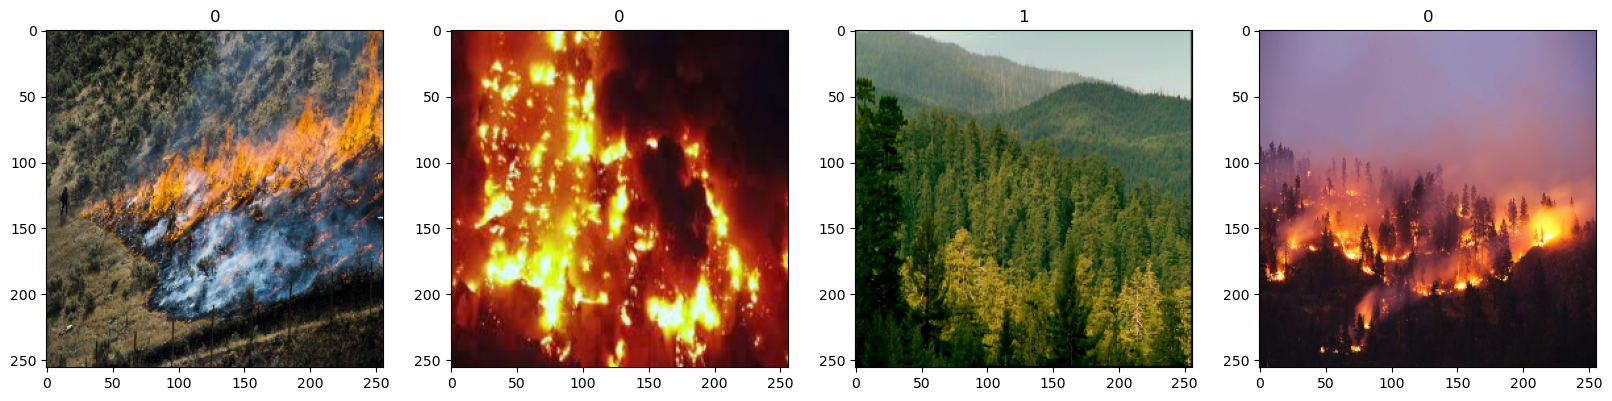

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[1.67493880e-01, 4.20036763e-02, 0.00000000e+00],
          [1.69669122e-01, 4.31372561e-02, 0.00000000e+00],
          [1.76470593e-01, 4.31372561e-02, 0.00000000e+00],
          ...,
          [1.89437807e-01, 1.98459402e-02, 0.00000000e+00],
          [1.94402173e-01, 2.62955613e-02, 0.00000000e+00],
          [1.69272631e-01, 6.77849259e-03, 0.00000000e+00]],
 
         [[1.67493880e-01, 4.20036763e-02, 0.00000000e+00],
          [1.69669122e-01, 4.31372561e-02, 0.00000000e+00],
          [1.76470593e-01, 4.31372561e-02, 0.00000000e+00],
          ...,
          [1.97370887e-01, 2.85692401e-02, 0.00000000e+00],
          [2.06694245e-01, 3.49800847e-02, 0.00000000e+00],
          [1.87723264e-01, 1.41478898e-02, 0.00000000e+00]],
 
         [[1.67493880e-01, 4.20036763e-02, 0.00000000e+00],
          [1.69669122e-01, 4.31372561e-02, 0.00000000e+00],
          [1.76470593e-01, 4.31372561e-02, 0.00000000e+00],
          ...,
          [2.05583647e-01, 3.50938998e-02, 8.5740

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

25

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(256, 256, 3)))  # Use Input(shape) as the first layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5950 - loss: 1.0068 - val_accuracy: 0.8170 - val_loss: 0.3288
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8555 - loss: 0.3187 - val_accuracy: 0.9107 - val_loss: 0.2144
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9241 - loss: 0.1847 - val_accuracy: 0.9330 - val_loss: 0.2151
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9293 - loss: 0.1808 - val_accuracy: 0.9330 - val_loss: 0.1562
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9561 - loss: 0.1194 - val_accuracy: 0.9196 - val_loss: 0.1363
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9605 - loss: 0.0981 - val_accuracy: 0.9152 - val_loss: 0.1681
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9614 - loss: 0.0964 - val_accuracy: 0.9375 - val_loss: 0.1609
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9647 - loss: 0.0976 - val_accuracy: 0.9464 - val_loss:

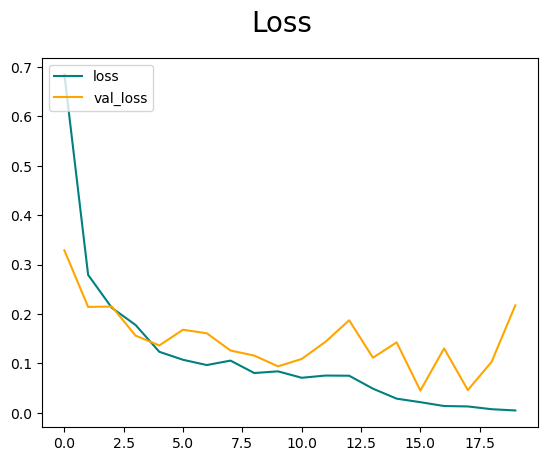

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

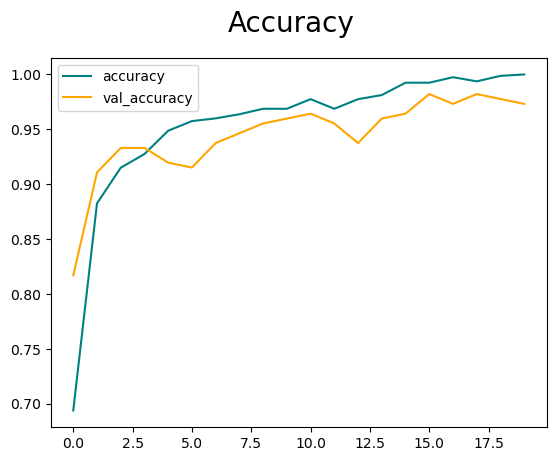

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95652175, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [40]:
import cv2

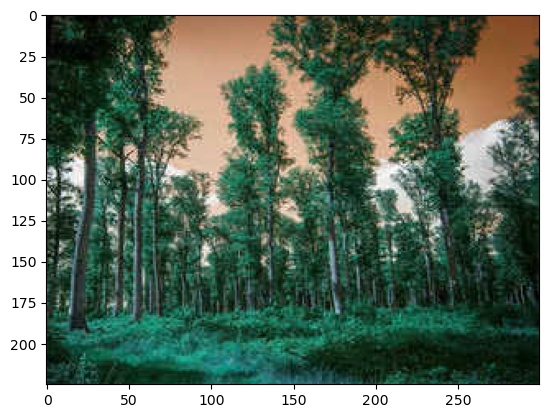

In [49]:
img = cv2.imread('non_fire.232.png')
plt.imshow(img)
plt.show()

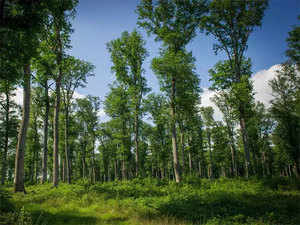

In [54]:
from IPython.display import Image
Image(filename='non_fire.232.png') 

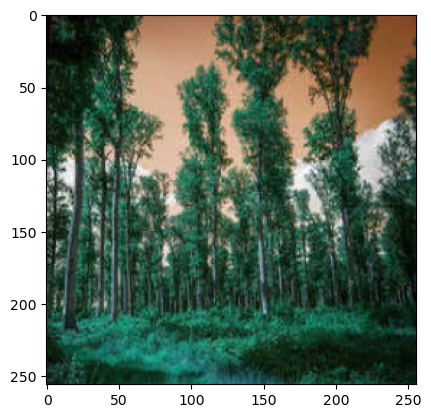

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [52]:
yhat

array([[0.99082786]], dtype=float32)

In [53]:
if yhat > 0.5: 
    print(f'Predicted class is non fire')
else:
    print(f'Predicted class is fire')

Predicted class is non fire
